# 머신러닝 모델 평가
모델 평가의 핵심은 데이터를 Train,Valid,Test로 분할하는 것.  
Train data로 학습하고, Valid data로 검증하고 test data로 최종적으로 모델을 테스트해보는 방법으로 진행함.  
검증 단계에서 모델의 성능을 평가하고 하이퍼 파라미터 수정을 통해 모델의 성능을 개선시키며 좋은 모델을 얻을 수 있게 됨.  
하지만 지나치게 valid data로 모델의 설정을 튜닝하면 valid data에 과대적합되는 결과로 이어질 수도 있으므로, 튜닝을 할 때는 valid data가 아닌 이전에 본적 없는 새로운 데이터로 사용해야합니다.
데이터를 분할 하는 방법은 크게 홀드아웃, KFold교차검증, 셔플링을 사용한 반복 KFold교차검증이 있음.

## 홀드아웃 검증
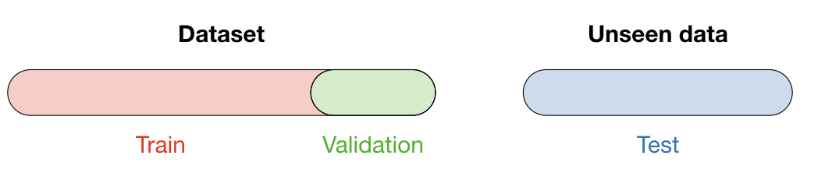

In [43]:
from tensorflow.keras.datasets import mnist
import numpy as np
(train,train_label),(test,test_label)=mnist.load_data()

In [44]:
validation=10000
# np.random.shuffle(train)
valid_data=train[:validation]
valid_lab=train_label[:validation]

train_data=train[validation:]
train_lab=train_label[validation:]

In [46]:
len(train_data)

50000

In [47]:
len(valid_data)

10000

### 데이터 분할

In [48]:
train_data=train_data.reshape(len(train_data),28*28)
train_dt=train_data.astype('float32')/255
valid_data=valid_data.reshape(len(valid_data),28*28)
valid_dt=valid_data.astype('float32')/255

### 모델링 학습 및 검증

In [49]:
from tensorflow import keras
from tensorflow.keras import layers
def make_model():
    model=keras.Sequential([
        layers.Dense(512,activation='relu'),
        layers.Dense(10,activation='softmax')
    ])
    model.compile(optimizer='rmsprop',
                 loss='sparse_categorical_crossentropy',
                 metrics='accuracy')
    return model

In [50]:
model=make_model()

In [60]:
history=model.fit(train_dt,train_lab,epochs=10,batch_size=128,validation_data=(valid_dt,valid_lab))

Epoch 1/10
391/391 [==============================] - 6s 14ms/step - loss: 0.0083 - accuracy: 0.9975 - val_loss: 0.0842 - val_accuracy: 0.9806
Epoch 2/10
391/391 [==============================] - 6s 14ms/step - loss: 0.0063 - accuracy: 0.9984 - val_loss: 0.0875 - val_accuracy: 0.9799
Epoch 3/10
391/391 [==============================] - 6s 14ms/step - loss: 0.0051 - accuracy: 0.9987 - val_loss: 0.0887 - val_accuracy: 0.9806
Epoch 4/10
391/391 [==============================] - 6s 14ms/step - loss: 0.0041 - accuracy: 0.9989 - val_loss: 0.0894 - val_accuracy: 0.9793
Epoch 5/10
391/391 [==============================] - 6s 14ms/step - loss: 0.0033 - accuracy: 0.9991 - val_loss: 0.0955 - val_accuracy: 0.9797
Epoch 6/10
391/391 [==============================] - 6s 14ms/step - loss: 0.0020 - accuracy: 0.9995 - val_loss: 0.0953 - val_accuracy: 0.9809
Epoch 7/10
391/391 [==============================] - 5s 14ms/step - loss: 0.0020 - accuracy: 0.9995 - val_loss: 0.0913 - val_accuracy: 0.9817

### 모델링 평가

In [71]:
test_data=test.reshape(len(test),28*28)
test_dt=test_data.astype('float32')/255

In [56]:
len(test_dt)

10000

In [58]:
len(test_label)

10000

In [72]:
model.evaluate(test_dt,test_label)

313/313 [==============================] - 1s 3ms/step - loss: 0.1002 - accuracy: 0.9809


[0.10018432140350342, 0.98089998960495]

홀드아웃 방식은 데이터의 수가 너무 적을 때 과소 적합되거나 전체데이터를 통계적으로 대표하지 못하는 문제가 발생함.  
난수로 데이터를 다르게 분할해 모델의 성능을 비교하면 성능차이가 클 가능성이 큼.  
그래서 데이터의 수가 적을 때는 KFold나 셔플링방식으로 데이터 분할 방법의 대체가 가능함.

## KFold 교차검증
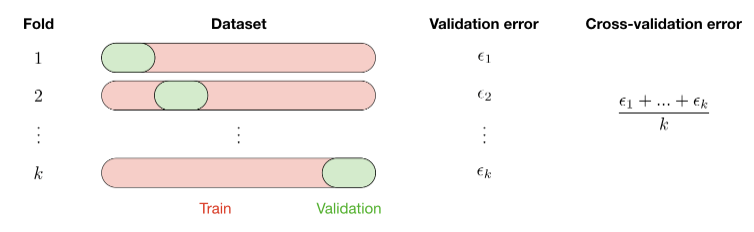

In [75]:
from sklearn.model_selection import KFold
k=KFold(n_splits=3)

### 3개의 폴드로 데이터 분할 및 학습, 평가

In [85]:
eval=[]
his=[]
for tr,val in k.split(train_dt):
    train_k,valid_k=train_dt[tr],train_dt[val]
    train_lab_k,valid_lab_k=train_lab[tr],train_lab[val]
    model=make_model()
    
    history=model.fit(train_k,train_lab_k,epochs=10,batch_size=128,validation_data=(valid_k,valid_lab_k))
    his.append(history)
    res=model.evaluate(test_dt,test_label)
    eval.append(res)

Epoch 1/10
261/261 [==============================] - 5s 14ms/step - loss: 0.3315 - accuracy: 0.9021 - val_loss: 0.2051 - val_accuracy: 0.9405
Epoch 2/10
261/261 [==============================] - 4s 14ms/step - loss: 0.1463 - accuracy: 0.9569 - val_loss: 0.1388 - val_accuracy: 0.9587
Epoch 3/10
261/261 [==============================] - 3s 12ms/step - loss: 0.0969 - accuracy: 0.9711 - val_loss: 0.1174 - val_accuracy: 0.9639
Epoch 4/10
261/261 [==============================] - 4s 14ms/step - loss: 0.0699 - accuracy: 0.9798 - val_loss: 0.0998 - val_accuracy: 0.9712
Epoch 5/10
261/261 [==============================] - 3s 13ms/step - loss: 0.0505 - accuracy: 0.9853 - val_loss: 0.0941 - val_accuracy: 0.9728
Epoch 6/10
261/261 [==============================] - 3s 13ms/step - loss: 0.0377 - accuracy: 0.9888 - val_loss: 0.0943 - val_accuracy: 0.9723
Epoch 7/10
261/261 [==============================] - 4s 14ms/step - loss: 0.0278 - accuracy: 0.9916 - val_loss: 0.0911 - val_accuracy: 0.9744

### K개의 폴드의 Test 점수의 평균

In [94]:
import pandas as pd
evaluate=pd.DataFrame(eval,columns=['loss','accuracy'])

In [97]:
evaluate.mean(axis=0)

loss        0.084037
accuracy    0.976467
dtype: float64

각 i번째 폴드마다 Valid data, k-1개의 폴드는 Train data로 사용해 모델을 훈련하고 평가함.  
최종 점수는 이렇게 나온 K개의 평가점수들의 평균을 구해 산출해냄.  
K-Fold는 데이터 분할에 따라 편차가 심할 때 효과적인 분할 방법임.  

## 모델 평가에 유의할 점
**대표성있는 데이터** : Train,Valid,Test data가 대표성을 가진 데이터여야 함. 다중 분류에서 클래스별로 오름차순 되어있다면 데이터를 순서대로 분할하면 모든 클래스를 포함하지 않게됨. 그러므로 셔플링을 통해 분할된 데이터가 대표성을 가지도록 해야함. 


**시간의 방향** : 시간성을 가지는 데이터는 과거의 데이터를 이용해 미래를 예측하는데 쓰임. 그러므로 이런 데이터는 셔플링을 하지않고 데이터를 분할해 미래의 데이터가 누설되지 않도록 분석을 진행해야 함.  


**데이터 중복** : 한 데이터셋에서 같은 데이터가 두번 나오게된다면 데이터를 셔플링하고, 분할할 때 다른 데이터셋임에도 같은 데이터가 중복될 수 있음. 그러므로 Train과 Valid data에 중복된 데이터가 없는 지 확인해야 함.